In [27]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

[<matplotlib.lines.Line2D object at 0x0000020F1A433D48>, <matplotlib.lines.Line2D object at 0x0000020F1A357108>]


Text(0, 0.5, '두 번째 특성')

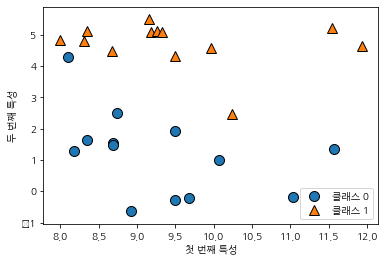

In [5]:
#1 데이터셋 살펴보기 => 산점도 그려서보기(저차원에서만 가능하지만 꼭 먼저 이 작업 필요)
X, y = mglearn.datasets.make_forge()

print(mglearn.discrete_scatter(X[:,0],X[:,1],y))
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")

Text(0, 0.5, '타깃')

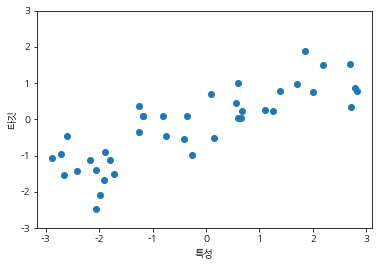

In [8]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,"o")
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [32]:
#분석할 데이터 살펴보기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.data.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)


In [37]:
print("유방암 데이터의 형태:", cancer.data.shape)
print("클래스별 샘플 갯수:\n",{n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})
print("특성의 이름:\n",cancer.feature_names)
print("데이터 정보:", cancer.DESCR[:200]+"....")

유방암 데이터의 형태: (569, 30)
클래스별 샘플 갯수:
 {'malignant': 212, 'benign': 357}
특성의 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
데이터 정보: .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attr....


In [40]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)
X,y= mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)   #특성공학 이용해서 13개 변수 104개로 만들기

데이터의 형태: (506, 13)
X.shape: (506, 104)


None
None


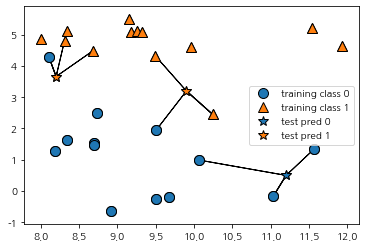

In [44]:
#3 K-최근접이웃
print(mglearn.plots.plot_knn_classification(n_neighbors=1)) # 예시
print(mglearn.plots.plot_knn_classification(n_neighbors=3))

In [48]:
#make_forge 예시
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train, y_test = train_test_split(X,y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)

print("테스트 예측:", clf.predict(X_test))
print("테스트 정확도: %.2f" % clf.score(X_test,y_test))

테스트 예측: [1 0 1 0 1 0 0]
테스트 정확도: 0.86


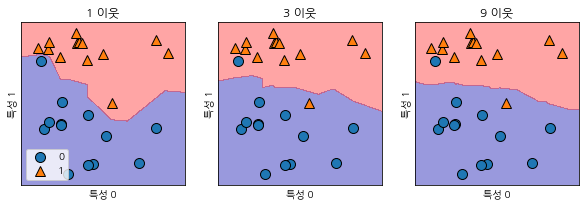

In [51]:
#분석해보기
fig, axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("%s 이웃" % (n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)

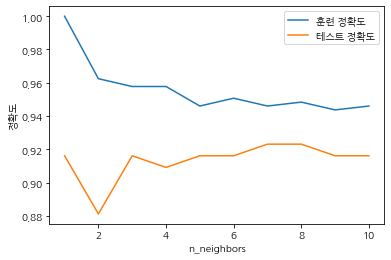

In [56]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=0)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

None
None


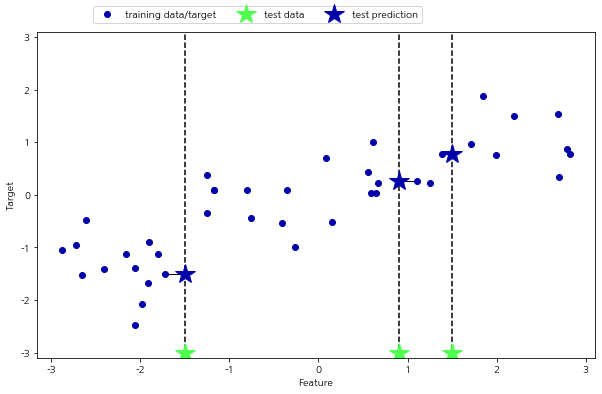

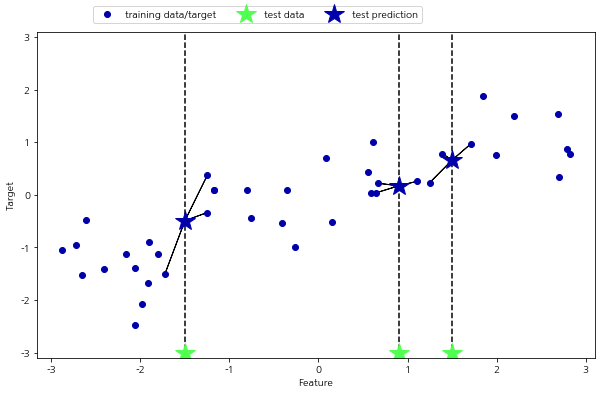

In [57]:
###k-최근접 이웃회구
print(mglearn.plots.plot_knn_regression(n_neighbors=1))
print(mglearn.plots.plot_knn_regression(n_neighbors=3))

In [60]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

print("테스트 세트 R*2: %.2f" % reg.score(X_test,y_test))


테스트 세트 R*2: 0.83


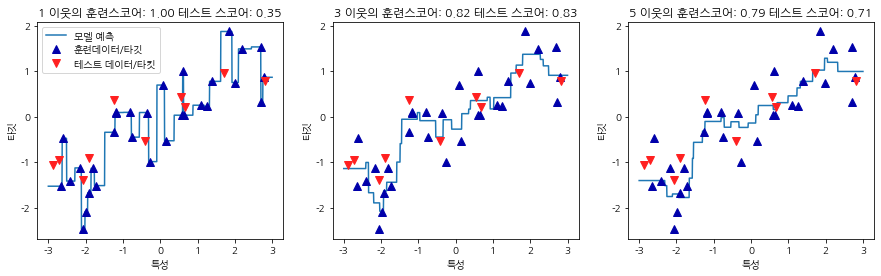

In [63]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,5], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test,y_test,"v", c = mglearn.cm2(1), markersize=8)
    
    ax.set_title("%d 이웃의 훈련스코어: %.2f 테스트 스코어: %.2f" % (n_neighbors, reg.score(X_train,y_train), reg.score(X_test,y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측","훈련데이터/타깃","테스트 데이터/타킷"], loc="best")